#  Лабораторная работа
**Тема "Изучение работы со строками. Изучение циклов"**
Что требуется сделать:
 1) Установить <a href="https://notepad-plus-plus.org/">Notepad++.</a>
 2) Установить <a href="https://www.dosbox.com/">DosBox.</a>
 3) Создать папку "C:\D".
 4)Работать будем, 
 используя путь "C:\D\Git_Hub\HowTo_FASM".
 Туда скачать и распаковать <a href="https://flatassembler.net/">Flat_Assembler.</a>

А теперь объясним, что это и зачем.
Flat_Assembler - ...<br/>
содержит компилятор "FASM.exe", только компилятор, причем пакетно запускаемый. Параметров запуска немного, если не ошибаюсь - только объемы оперативной памяти, поэтому сейчас об этом не заботимся.<br/>
Eсть FASMW.exe - среда разработки. Позволяет писать текст, сохранять, компилировать, запускать скомпилированное. FASMW.exe - уже не обладает возможностями пакетного запуска, поэтому удастся запустить только программу, написанную под Windows.<br/>
"Выкручиваемся", используя Notepad++. Создаем 2 файла: "_hello_.asm" и "_hello_.bat".

In [ ]:
; Это комментарий на языке Ассемблер
;"_hello_.asm"
use16               ;Генерировать 16-битный код
org 100h            ;Программа начинается с адреса 100h
;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;
jmp start
hello db 'Hello, world!$'
_char db 'H$'
_The_Fin db '_The_Fin$'
;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;
start:
    mov dx,hello
    mov ah,9
    int 21h
	;;;
	;Вывод символа перехода на новую строку
    mov dl,0ah
    mov ah,2
    int 21h
	;;;
	;Вывод символа перехода на новую строку
    mov dl,0ah
    mov ah,2
    int 21h
	;;;
    mov dx,_The_Fin
    mov ah,9
    int 21h
	;;;
	;Вывод символа перехода на новую строку
    mov dl,0ah
    mov ah,2
    int 21h
	;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;
    ;/Ожидание нажатия клавиши
    mov ah,01h
    int 21h
	;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;
    mov ax,4C00h    ;
    int 21h         ;/ Завершение программы
;-------------------------------------------------------

In [ ]:
:: Это комментарий на языке Dos
::"_hello_.bat"
@echo off
echo %cd%
cd C:\D\Git_Hub\HowTo_FASM\000_HelloWorld
echo %cd%
set FileName=_hello_
..\Fasm\FASM.EXE %FileName%.ASM
"C:\Program Files (x86)\DOSBox-0.74-3\DOSBox.exe" %FileName%.COM
::pause

Как работать со всем этим?<br/>
Пишем код. Сохраняем. Нажимаем F5, выбираем "_hello_.bat".<br/>
Последующая разработка выглядит так. Пишем код, сохраняем, нажимаем F5, нажимаем Enter.<br/>
При подобном запуске из Notepad++ адрес директории будет "C:\Program Files\Notepad++".<br/>
Об этом мы узнаем из команды "echo %cd%"<br/>
Следующей командой "cd C:\D\Git_Hub\HowTo_FASM\000_HelloWorld" мы меняем адрес директории на локальный (на папку, где лежат файлы).<br/>
"echo %cd%" -  повторно убеждаемся, что находимся в нашей папке. "C:\D\Git_Hub\HowTo_FASM\000_HelloWorld"<br/>
После этого пишем следующий программный код:<br/>
"(путь до компилятора FASM.exe)" "(путь до \_hello\_.asm)" <br/>
Это был пакетный запуск компилятора с нашим компилируемым файлом, как параметром.<br/>
После этого мы получаем в нашей локальной папке "\_hello\_.com".<br/>
Теперь уже этот файл можно запустить в DosBox строкой:<br/>
"C:\Program Files (x86)\DOSBox-0.74-3\DOSBox.exe" %FileName%.COM
<br/><br/>
Распространенные ошибки.<br/>
Сетевое расположение папки. Виртуальные логические диски, созданные запускаемыми приложениями, антивирусники, эмульгаторы $*$.iso и просто установленное большое количество игрушек на компьютере (это был тонкий намек).<br/>
Ну и напоследок "::pause" - снимаете комментарий и приложение будет работать c паузой в конце, если оно потребуется.<br/>
Приведем скрин того, как  выглядит работающее приложение.<br/>

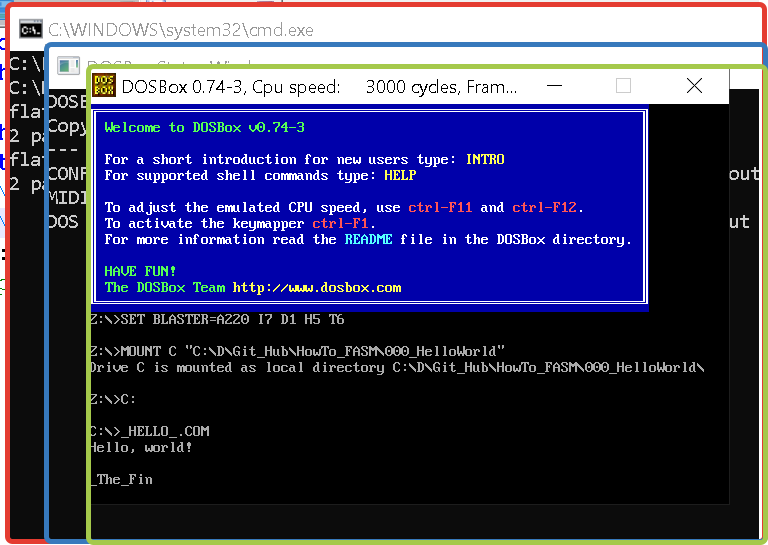

# Задание
Примерные варианты контрольных задач. <br/>
- 1) Найти в строке позицию заданного символа.
- 2) Определить, есть ли в двух строках одинаковые символы на одинаковых позициях.
- 3) Найти позицию, на которой две строки символов отличаются.
- 4) Удалить из строки заданный символ.
- 5) Удалить из строки символ на заданной позиции.

Задание классифицирую как сложное. Выполняется в несколько этапов.
- Этап первый. Изучить создание переменных и вывод на экран.
- Этап второй. Изучить механику условных переходов.
- Этап третий. Изучить создание циклов.
- Этап четвертый. Собрать все воедино в виде моноблока исполняемых ассемблерных кодов.

# Этап первый. Изучить создание переменных и вывод на экран.
Для создания локальных переменных при помощи команды безусловного перехода jmp создаем недостижимый карман программного кода между строками "jmp start" и "start:".<br/>
"start:" - метка.<br/>
Это просто кусок оперативной памяти, в который в ASKI кодах укладывается текст. В Dos символом конца строки явпяется доллар. Все процедуры работают, исходя из этого. По аналогии можно насоздавать dw (word), dd (DWord)... Но ощутимой разницы мы не почувствуем...
<br/>
db - это директива создания данных типа byte по 8 бит, это означает что 'Hello, world!$' занимает 8*14 бит.<br/>
Отныне 'hello' -  ключевое слово, которое компилятором будет заменено на указатель адреса начала строки... Да, Ассемблер работает только с указателями.<br/>

In [ ]:
jmp start
hello db 'Hello, world!$'
_char db 'H$'
_The_Fin db '_The_Fin$'
;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;
start:

Для изучения вывода на экран нам потребуется доступ к Интернету или книга-справочник по прерываниям dos.<br/>
Предлагается книга Хитрово Н.Г. "Начала системного программирования в среде MS-DOS7". <br/>

# Этап второй. Изучить механику условных переходов
Вот программа, тестирующая условные переходы
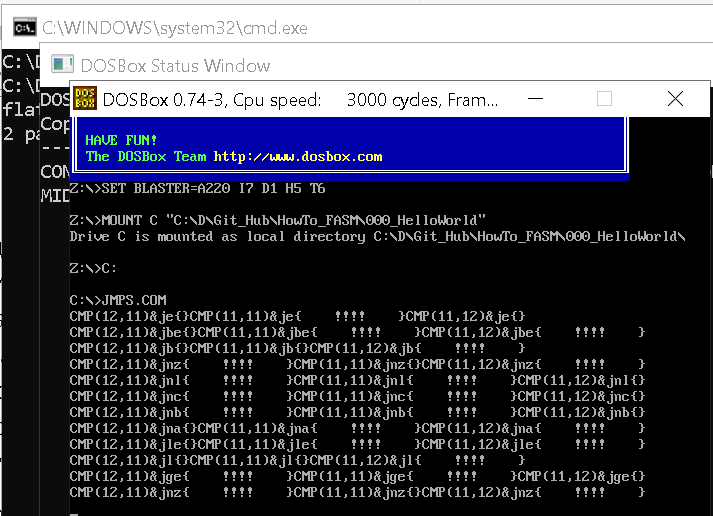

In [ ]:
;JMPS_Start.bat
@echo off
echo %cd%
::cd C:\Fasm\Projects\001_JMP_S
cd C:\D\Git_Hub\HowTo_FASM\000_HelloWorld
echo %cd%
set FileName=JMPS
::C:\Fasm\FASM.EXE %FileName%.ASM
C:\D\Git_Hub\HowTo_FASM\Fasm\FASM.EXE %FileName%.ASM
"C:\Program Files (x86)\DOSBox-0.74-3\DOSBox.exe" %FileName%.COM
::pause

In [ ]:
;JMPS.asm
use16               ;Генерировать 16-битный код
org 100h            ;Программа начинается с адреса 100h
;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;
jmp start
_ok db '!!!!!!$'
_The_Fin db '_The_Fin$'
;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;
include '..\macroDos\__Console_V0.inc'
start:
;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;
	
	__Test.CMP.Oll je
	__Test.CMP.Oll jbe
	__Test.CMP.Oll jb
	__Test.CMP.Oll jnz
	__Test.CMP.Oll jnl
	__Test.CMP.Oll jnc
	__Test.CMP.Oll jnb
	__Test.CMP.Oll jna
	__Test.CMP.Oll jle
	__Test.CMP.Oll jl
	__Test.CMP.Oll jge
	__Test.CMP.Oll jnz
	
;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;
    ;Ожидание нажатия клавиши
    mov ah,01h
    int 21h
    ;Завершение программы
    mov ax,4C00h
    int 21h
;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;

include '..\macroDos\__Console_V0.inc' - вызов библиотеки макросов.<br/>
\_\_Test.CMP.Oll jl - вызов параметрического макроса, тестирующего заданный переход. <br/>
Примем соглашение, что далее: все макросы, написанные нами, будут начинаться с двух нижних подчеркиваний; все локальные переменные, написанные нами, будут начинаться с одного нижнего подчеркивания. <br/>
Из N++ , кликнув правой кнопкой на названии библиотеки, можно затем в контекстном меню выбрать и открыть файл. Не забудьте предварительно выделить полный путь и название через shift...
("..\" - означает подъем на каталог выше).<br/>
Так мы увидим программный код библиотеки макросов.<br/>

\_\_Console_V0.inc - эта библиотека написана нами для работы с консолью,
тестирования условных переходов и решения подобных мелких прикладных задач. Работает под DosBox.

In [ ]:
;__Console_V0.inc
;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;
macro __WriteChar _Char
{
	push ax
	push dx
		mov dl, _Char
		;mov dl,al;Вывод вывод одного символа из dl на экран
		mov ah,2
		int 21h
	pop dx
	pop ax
}
macro __WriteChar_N{__WriteChar 0ah}
macro __Write _str
{
	push ax
	push dx
		mov dx, _str;dx - положите указатель на строку;Например вот так;mov dx,hello
		mov ah,9
		int 21h
	pop dx
	pop ax
}
macro __WriteLN _str
{
	__Write _str
	__WriteChar_N
}
macro __ReadKeyToAL
{;;Запись одного символа в регистр AL
		mov ah,1
		int 21h
}
macro __SharpX _count
{
	local m_1
	push ecx
	push dx
	mov ecx,_count
	m_1:
		__WriteChar 35
	loop m_1
	__WriteChar_N
	pop dx
	pop ecx
}
macro __SharpX79{__SharpX 79}
;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;
macro __TestCMP _A,_B,_JmpS
{
;;;Макрос тестирует работу условных переходов в FASM ПОД DOS
;;;Пример кода для запуска
;;;__TestCMP 10,10,jnz
;;;Вставка в текст прилетевших текстов кодов...
__RValue.Write 'CMP('#`_A#','#`_B#')&'#`_JmpS#'$'
	local m_1,m_2
	mov eax,_A
    cmp eax,_B
	__WriteChar '{'
	_JmpS m_1
	jmp m_2
    m_1:
		__RValue.Write '    !!!!    $'
	m_2:
__WriteChar '}'
;__WriteChar_N
}
macro __Test.CMP.Oll _JmpS
{
	__TestCMP 12,11,_JmpS
	__TestCMP 11,11,_JmpS
	__TestCMP 11,12,_JmpS
	__WriteChar_N
}
;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;
macro __RValue.Write _str
{
;;;
; l-value - требует предварительного создания переменной
; - Все макросы и процедуры  по умолчанию являются l-value
; r-value - не требует предварительного создания переменной
;;Терминология взята с сайта
;;https://ravesli.com/urok-190-ssylki-r-value/#toc-2
;;;
local m_data,__str
jmp m_data
	__str db _str
m_data:
	push ax
	push dx
		mov dx, __str;dx - положите указатель на строку;Например вот так;mov dx,hello
		mov ah,9
		int 21h
	pop dx
	pop ax
}
macro __RValue.WriteLN _str
{
	__RValue.Write _str
	__WriteChar_N
}
;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;

# Этап третий. Изучить создание циклов
Самое интересное, что для этого нам потребуется Visual Studio 2019 с++.<br/>
Пишем программный код с циклом с предусловием, с циклом с постусловием, с циклом со счетчиком и switch case.<br/>
Смотрим через дезассемблер, как все это устроено.<br/>
В этом нам поможет опять N++. В нем есть возможность выделить маркером сочетание букв. После этого маркером выделяются все вхождения этого слова в текст. Есть 4 цвета маркера. Это проще, чем выискивать в тексте адрес, на который осуществляется переход.<br/>
<br/>
После некоторой практики на Ассемблере станет заметно, что написание всех циклов и ветвлений очень похоже на цикл с предусловием, как в **BF**.<br/>

# Этап четвертый. Собрать все воедино в виде моноблока исполняемых ассемблерных кодов
Приведу пример программного кода под ConsoleWindows64, решение одной из ранее описанных задач. По этому примеру можно написать код и под DosBox.<br/>
Для того чтобы начать писать на ассемблере требуется не многим больше команд чем есть в BF. Этот программный код копирует в новую строку все символы старой строки за исключением заглавной 'S', при этом используется только арифметика указателей и пересылка 8 битных byte машинных слов (Без использования команд обработки блоков данных).

In [ ]:
;_22_.asm
format PE64 console
entry start
;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;
;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;
include 'C:\D\Git_Hub\HowTo_FASM\Fasm\INCLUDE\win64a.inc'

include '..\macroWin\__Console_V0.inc'

section '.idata' import data readable
__InitConsoleSectionImport
;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;
section '.data' data readable writeable
__InitConsoleSectionData
	_str db 'QWESSSЫЫSSS<<sss>>',0
	_str2 db 255 dup(0)
	_char db '*',0	

	
section '.code' code readable executable
start:
__setlocale_Russian	
;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;
	__RValue.WriteLN 'Удаление символа из строки'
	__RValue.WriteLN 'Введите строку символов длиной до 255 символов:'
	;__RValue.Read '%s',_str
	;__Write _N
	__WriteLN _str
	__WriteLN _str2
	;rax - указатель первой строки
	;rbx - Символ первой строки
	;rcx - указатель второй строки
	xor rax,rax
	mov eax,_str
	xor rcx,rcx
	mov ecx,_str2
	m_20210115_1152:
		mov bl,byte [eax]
		mov byte [_char],bl
		;;;
			cmp bl,'S'
			jne m_20210115_1214
			JMP m_20210115_1213
				m_20210115_1214:
				mov byte [ecx],bl
				add ecx,1
			m_20210115_1213:
		;;;
		add eax,1
		mov bl,byte [eax]
	cmp bl,0
	jne m_20210115_1152
	__WriteLN _str
	__WriteLN _str2
;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;	
cinvoke system,_Pause
        jmp exit ;???????
exit:
		;invoke ExitProcess, 0
		push 0
		call [ExitProcess]

In [ ]:
::_22_Start.bat
@echo off
echo %cd%
cd C:\D\Git_Hub\HowTo_FASM\002_
echo %cd%
set FileName=_22_

C:\D\Git_Hub\HowTo_FASM\Fasm\FASM.EXE %FileName%.ASM
%FileName%.EXE
pause

Мы написали почти такую же библиотеку макросов под Windows.
Косноль, тестирование условных переходов, вывод на экран состояний всех регистров без изменения состояния регистров.<br/>
Кстати, последняя задача - краеугольный камень программирования на Ассемблере на последующих этапах.<br/>

In [ ]:
;..\macroWin\__Console_V0.inc
;Макросы FASM консоль Winda
;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;
macro __InitConsoleSectionImport
{
;;section '.idata' import data readable
	library kernel,'kernel32.dll',\
			msvcrt,'msvcrt.dll'
	import kernel,\
		   ExitProcess,'ExitProcess'
	import msvcrt,\
		   setlocale,'setlocale',\
		   printf,'printf',\
		   scanf,'scanf',\
		   system,'system'
}
macro __InitConsoleSectionData
{
;;section '.data' data readable writeable
		_Russian db 'Russian',0
        _Pause db 'pause',0
		_N db 13,10,0
		_BraceCurlyBegin db '{',0
		_BraceCurlyEnd db '}',0
		_0 db '0',0
		_1 db '1',0
		_2 db '2',0
		_3 db '3',0
		_4 db '4',0
		_5 db '5',0
		_6 db '6',0
		_7 db '7',0
		_8 db '8',0
		_9 db '9',0
}
;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;
;; Консольный минимум				          ;;
;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;
macro __setlocale_Russian{cinvoke setlocale,0,_Russian}
macro __Write _Char{
push rax
push rbx
push rcx
push rdx
pushf
	cinvoke printf,_Char
popf
pop rdx
pop rcx
pop rbx
pop rax
}
macro __WriteLN _Char{
__Write _Char
__Write _N
}
macro __RValue.Write Char{
local m_data,_Char
jmp m_data
	_Char db Char,0
m_data:
	__Write _Char
}
macro __RValue.WriteLN Char{
__RValue.Write Char
__Write _N
}
macro __RValue.Read fmat,[param]{
COMMON
;COMMON - Директива, после которой программной
;код повторяется для всей групповой переменной
;[param]
;FORWARD/REVERSE (В Прямом/В Обратном порядке)- Директива, после которой программной
;код повторяется для каждого элемента
;групповой переменной [param] 
local m_data,_fmat
jmp m_data
	_fmat db fmat,0
m_data:
	cinvoke scanf,_fmat,param
}
macro __SharpX _count{
	local m_1
	push rcx
	xor ecx,ecx
	mov ecx,_count
	m_1:
		push rcx
		__RValue.Write '#'
		pop rcx
		dec ecx
		cmp ecx,0
	jnl	m_1
	__Write _N
	pop rcx
}
;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;
;; Тесты и проверки на условные переходы      ;;
;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;
macro __TestCMP _A,_B,_JmpS
{
;;;Макрос тестирует работу условных переходов в FASM ПОД win
;;;Пример кода для запуска
;;;__TestCMP 10,10,jnz
;;;Вставка в текст прилетевших текстов кодов...
__RValue.Write 'CMP('#`_A#','#`_B#')&'#`_JmpS#'$'
	local m_1,m_2
	mov eax,_A
    cmp eax,_B
	pushf
	push rax
	__Write _BraceCurlyBegin
	pop rax
	popf
	_JmpS m_1
	jmp m_2
    m_1:
	pushf
		push rax
		__RValue.Write '    !!!!    $'
		pop rax
	popf
	m_2:
__Write _BraceCurlyEnd
;__WriteChar_N
}
macro __Test.CMP.Oll _JmpS
{
	__TestCMP 12,11,_JmpS
	__TestCMP 11,11,_JmpS
	__TestCMP 11,12,_JmpS
	__Write _N
}
;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;
;; Битовые тесты с выводом на экран           ;;
;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;
macro __BiTest_MonoScript _TXT,_Count, _Param{
	local m_y89ryd3,m_4234423,m_4723649
	__RValue.Write _TXT
	push rax
	push rbx
	push rcx
	push rdx
	;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;
	xor rcx,rcx
	mov cl,_Count
	m_y89ryd3:
	;Циклические сдвиги выдвигают бит регистр флагов в EFLAGS.CF 
	;На EFLAGS.CF есть два перехода ;jc - если единица;jnc -если ноль
	shl _Param,1
	push rax
	push rbx
	push rcx
	push rdx
	jnc m_4234423
		__Write _1	
	jmp m_4723649
		m_4234423:
		__Write _0
	m_4723649:
	pop rdx
	pop rcx
	pop rbx
	pop rax
	sub cx,1
	;Переход, если результат не отрицательный
	jnz m_y89ryd3
	;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;
	pop rdx
	pop rcx
	pop rbx
	pop rax
	__RValue.WriteLN 'B'
}
macro __Test.BiTest_MonoScript{
	xor rax,rax
	mov al,10000000b
	__BiTest_MonoScript "AL=",8, AL
	;;;
	xor rax,rax
	mov ax,1000000000000000b
	__BiTest_MonoScript "AX=",16, AX
	;;;
	xor rax,rax
	mov eax,10000000000000000000000000000000b
	__BiTest_MonoScript "EAX=",32, EAX
	;;;
	xor rax,rax
	mov rax,1000000010000000000000000000000000100000000000000000000000000000b
	__BiTest_MonoScript "RAX=",64, RAX
	;;;
}
;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;
macro __BiTest_Flag{
push rax
push rbx
push rcx
push rdx
pushf
;;;
pop AX
push AX
	__RValue.WriteLN 'Flag=**N*ODITSZ*A*P*C'
	__BiTest_MonoScript 'Flag=',16, AX
;;;
popf
pop rdx
pop rcx
pop rbx
pop rax
}
;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;
macro __BiTest_Oll{
;https://en.wikipedia.org/wiki/FLAGS_register
;https://prog-cpp.ru/asm-command/
push rax
push rbx
push rcx
push rdx
pushf
	__BiTest_MonoScript "RAX=",64, RAX
	__BiTest_MonoScript "RBX=",64, RBX
	MOV RAX,RCX
	__BiTest_MonoScript "RCX=",64, RAX
	__BiTest_MonoScript "RDX=",64, RDX
popf
pop rdx
pop rcx
pop rbx
pop rax
;;;
__BiTest_Flag
}

Далее будут рассмотрены проблемы написания процедур и функций. <br/>
-Вызов call и 3-4 способа передачи параметров внутрь функций.<br/>
-Макросы как средство повышения быстродействия. (Полный курс макросов).<br/>
-Стек вызова функций и размещение всех локальных переменных в нем.<br/>
-Компьютерная графика под DosBox.<br/>
-Подключение и вызов системных библиотек с++ Windows.<br/>
-Написание тестового стенда для изучения работы сдвигов под FASM Windows.
-Ловим ошибки разработчиков FASM.<br/>
-Компьютерная графика под WinOpenGL.<br/>

<br/>
Ближайшие  перспективы.<br/>
- Ассемблерные команды MMX - аппаратное сложение  массивов, используется обычно в  криптографии и компьютерной графике.<br/>
- Работа с fword 48 бит. Аппаратная работа с дробными числами.<br/>
- Перебор материала <a href="https://www.cyberforum.ru/fasm/thread1240599.html"> 
  Мануал программера.flat assembler 1.71</a>. Выясняем какие  аппаратные процедуры работают под макроассемблер Windows FASM. Это настоящий ребус, разгадывание которого у нас впереди.